<a href="https://colab.research.google.com/github/canamac/zeka-can/blob/main/arbitraj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  10 of 10 completed


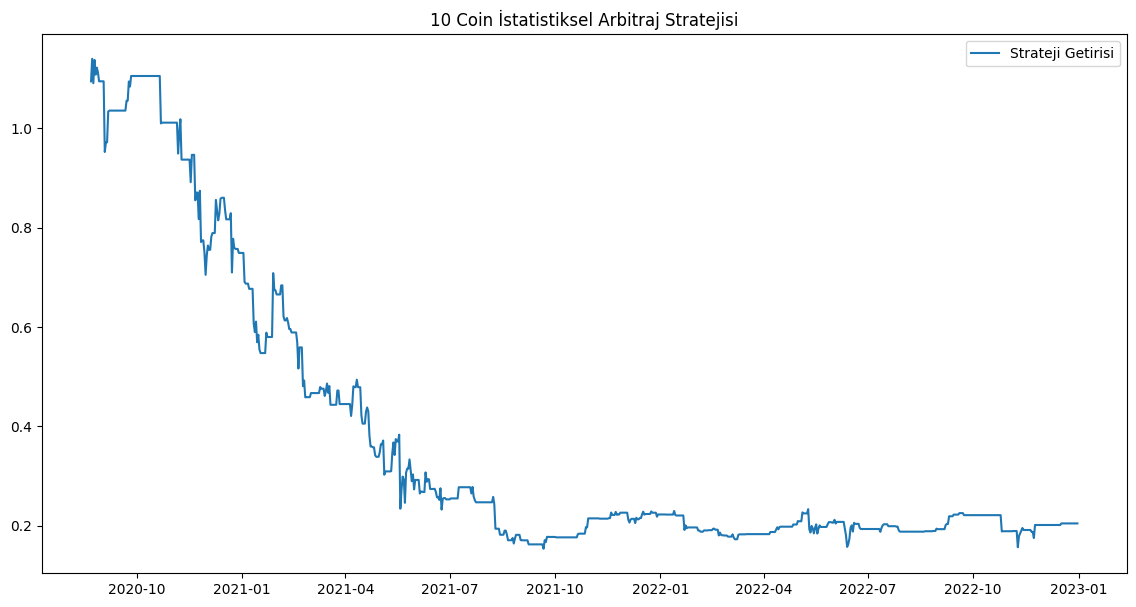

Date
2020-08-21         NaN
2020-08-22    1.094866
2020-08-23    1.140373
2020-08-24    1.091196
2020-08-25    1.138142
                ...   
2022-12-27    0.204722
2022-12-28    0.204722
2022-12-29    0.204722
2022-12-30    0.204722
2022-12-31    0.204722
Freq: D, Length: 863, dtype: float64


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 10 adet coin'in fiyat verilerini çekme
def get_data(symbols, start_date, end_date):
    data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']
    return data

# Z-score hesaplama
def calculate_zscore(series):
    return (series - series.mean()) / series.std()

# PCA tabanlı istatistiksel arbitraj stratejisi
def statistical_arbitrage(symbols, start_date, end_date):
    # Verileri çek
    data = get_data(symbols, start_date, end_date)
    data = data.dropna()

    # Log getirileri hesapla
    log_returns = np.log(data / data.shift(1)).dropna()

    # Verileri standardize et
    scaler = StandardScaler()
    scaled_returns = scaler.fit_transform(log_returns)

    # PCA uygula
    pca = PCA(n_components=2)  # İlk 2 bileşeni kullan
    pca.fit(scaled_returns)
    components = pca.transform(scaled_returns)

    # İlk bileşeni spread olarak kullan
    spread = components[:, 0]

    # Z-score hesapla
    zscore = calculate_zscore(spread)

    # Alım/Satım sinyalleri
    threshold = 1.0
    position = np.where(zscore > threshold, -1, np.nan)
    position = np.where(zscore < -threshold, 1, position)
    position = np.where(np.abs(zscore) < 0.5, 0, position)
    position = pd.Series(position, index=log_returns.index).ffill().fillna(0)

    # Getiri hesapla
    strategy_return = position.shift(1) * log_returns.mean(axis=1)
    cumulative_return = (1 + strategy_return).cumprod()

    # Sonuçları görselleştir
    plt.figure(figsize=(14, 7))
    plt.plot(cumulative_return, label='Strateji Getirisi')
    plt.title('10 Coin İstatistiksel Arbitraj Stratejisi')
    plt.legend()
    plt.show()

    return cumulative_return

# Örnek kullanım
symbols = ['BTC-USD', 'ETH-USD', 'BNB-USD', 'ADA-USD', 'DOGE-USD',
           'XRP-USD', 'DOT-USD', 'UNI-USD', 'LTC-USD', 'LINK-USD']
start_date = '2020-01-01'
end_date = '2023-01-01'

results = statistical_arbitrage(symbols, start_date, end_date)
print(results)